In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [7]:
Report = pd.read_csv('/content/Processed_data_crime.csv')

<ipython-input-7-f4391f8a82f9>:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  Report = pd.read_csv('/content/Processed_data_crime.csv')


In [8]:
Education_Report = pd.read_excel('/content/Neighborhood_EducationData.xlsx')
School_Report = pd.read_excel('/content/Neighbouhood_SchoolEnrollmentData.xlsx')

In [9]:
# Merge Education and School datasets on the 'Level' column
EducationReport = pd.merge(Education_Report, School_Report, on='DISTRICT', how='inner')

In [10]:
Report.shape

(216538, 16)

In [11]:
Report.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat', 'Long', 'Location', 'Tier'],
      dtype='object')

In [12]:
null_values_per_column = Report.isnull().sum()
print(null_values_per_column)

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA         31938
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                     0
Lat                        0
Long                       0
Location                   0
Tier                       0
dtype: int64


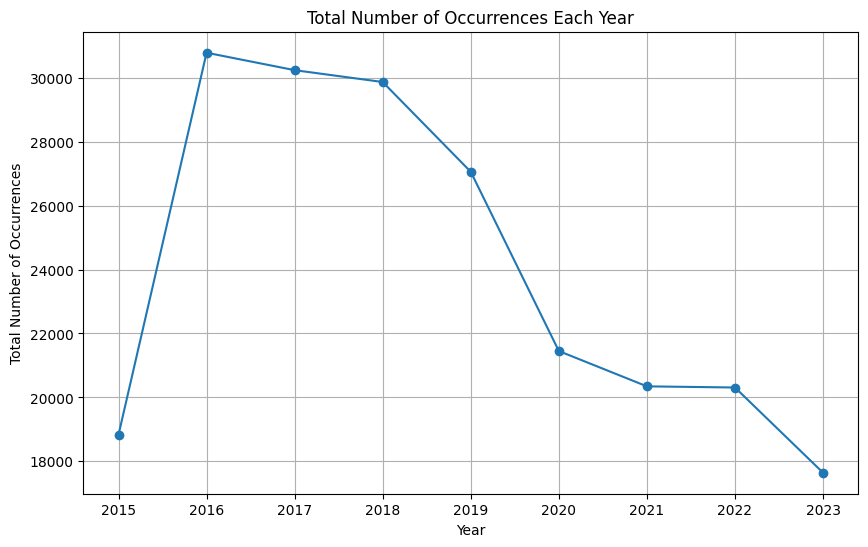

In [13]:
# Convert 'OCCURRED_ON_DATE' to datetime format
Report['OCCURRED_ON_DATE'] = pd.to_datetime(Report['OCCURRED_ON_DATE'])

# Extract relevant columns
Report_yearly_total = Report[['OCCURRED_ON_DATE', 'YEAR']]

# Group by year and count occurrences
yearly_total_counts = Report_yearly_total.groupby('YEAR').size()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_total_counts.index, yearly_total_counts.values, marker='o')
plt.title('Total Number of Occurrences Each Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Occurrences')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

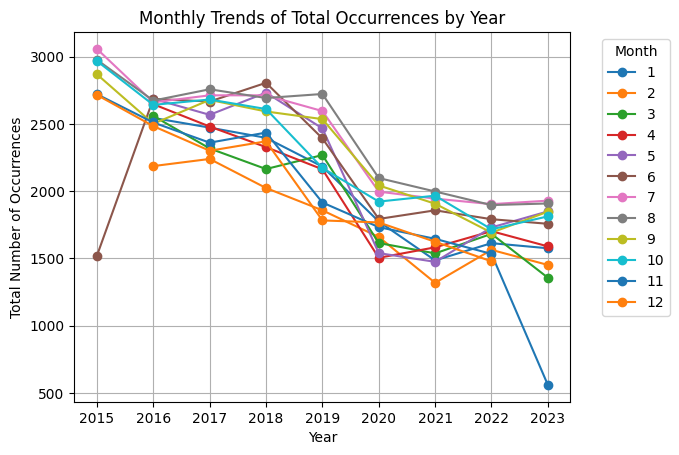

In [14]:
# Extract relevant columns
Report_monthly_total = Report[['OCCURRED_ON_DATE', 'YEAR', 'MONTH']]

# Group by year and month and count occurrences
monthly_total_counts = Report_monthly_total.groupby(['YEAR', 'MONTH']).size().unstack()

# Plot the data
plt.figure(figsize=(12, 8))
monthly_total_counts.plot(kind='line', marker='o')
plt.title('Monthly Trends of Total Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Occurrences')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

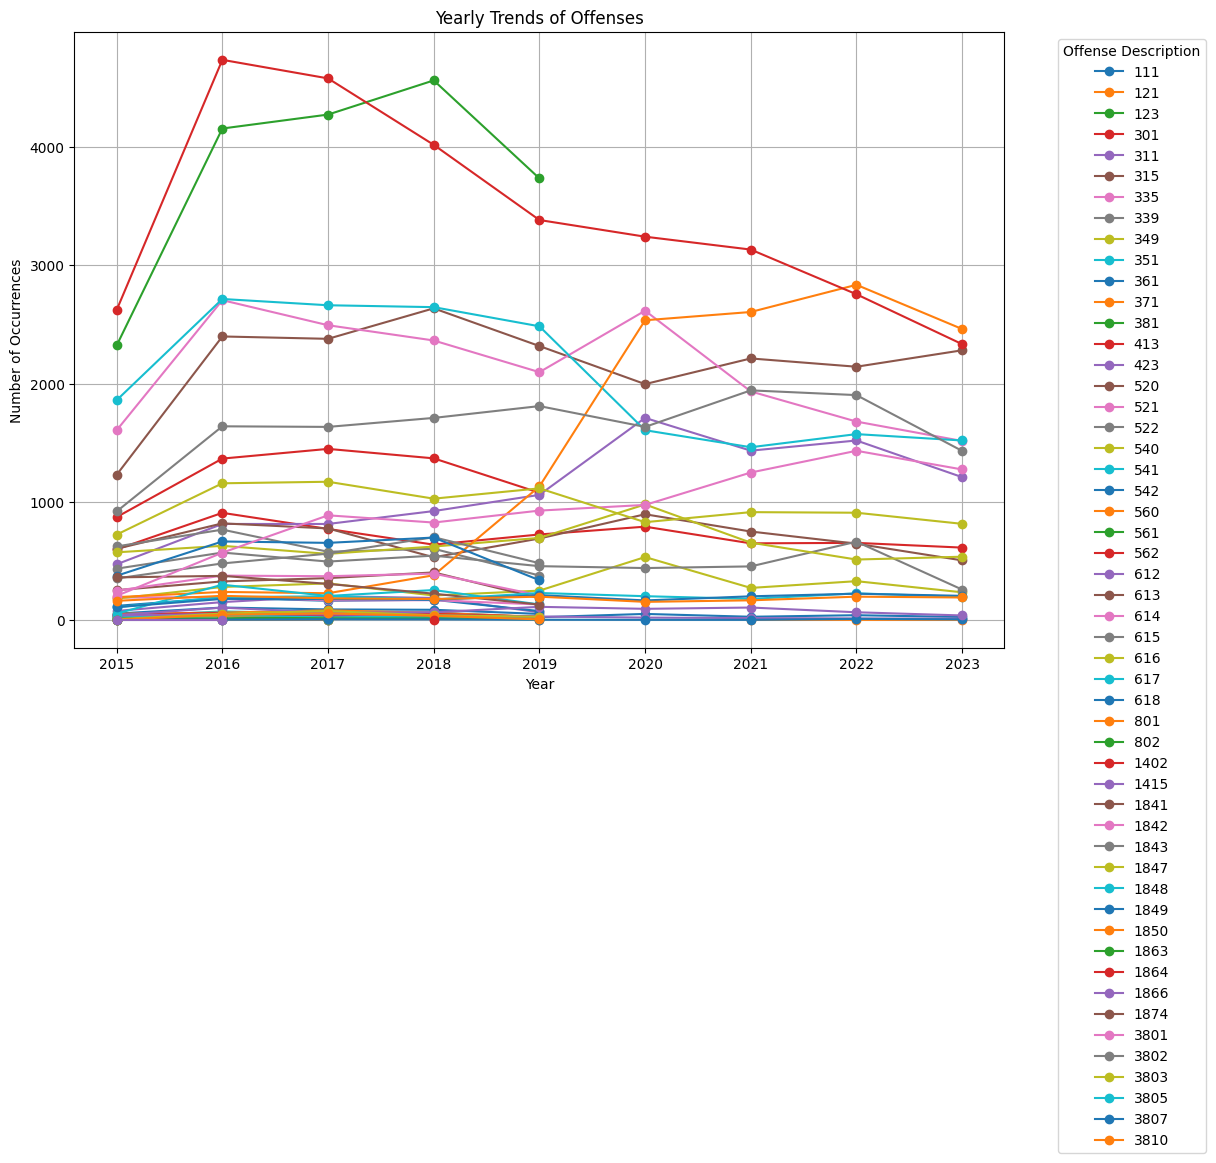

In [15]:
# Extract relevant columns
Report_yearly = Report[['OCCURRED_ON_DATE', 'YEAR', 'OFFENSE_CODE']]

# Group by year and count occurrences
yearly_counts = Report_yearly.groupby(['YEAR', 'OFFENSE_CODE']).size().unstack()

# Plot the data
yearly_counts.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Yearly Trends of Offenses')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Offense Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

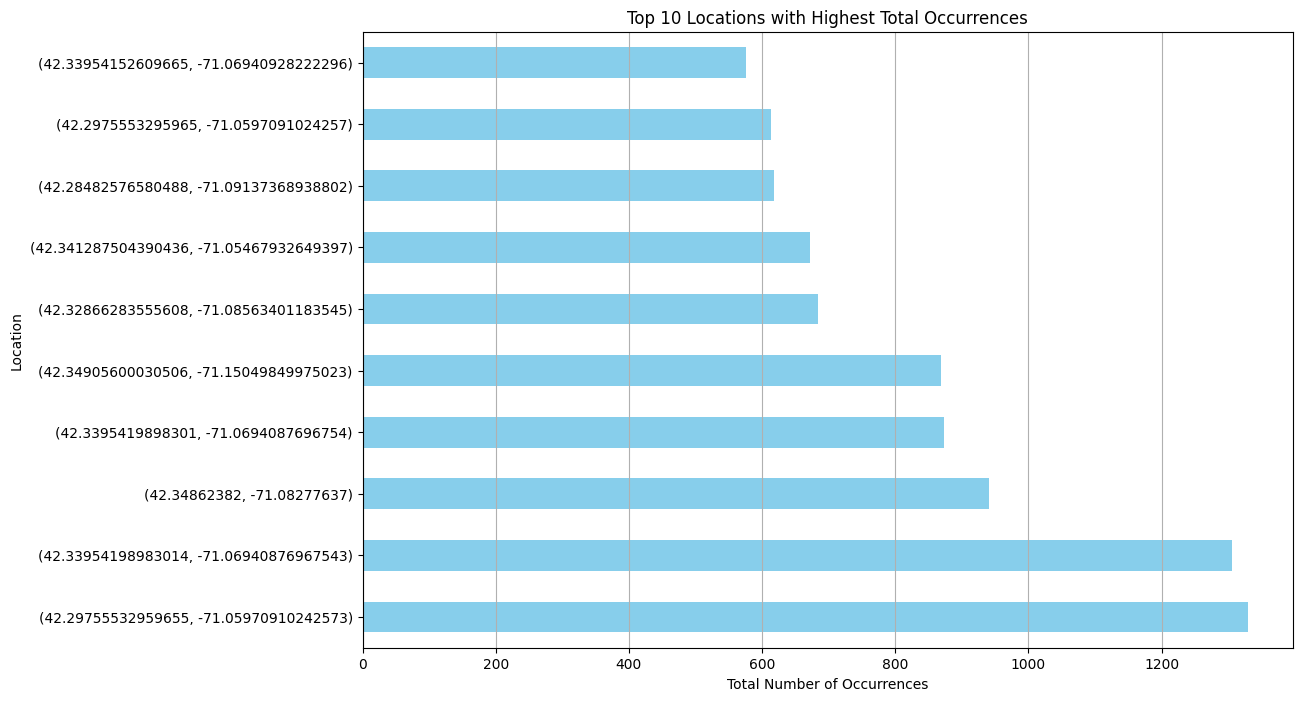

In [16]:
# Extract relevant columns
Report_location_total = Report[['Location', 'YEAR']]

# Group by location and year, count occurrences, and get the top 10 locations
top_locations = Report_location_total.groupby(['Location', 'YEAR']).size().unstack().sum(axis=1).nlargest(10)

# Plot the data
plt.figure(figsize=(12, 8))
top_locations.plot(kind='barh', color='skyblue')
plt.title('Top 10 Locations with Highest Total Occurrences')
plt.xlabel('Total Number of Occurrences')
plt.ylabel('Location')
plt.grid(axis='x')
plt.show()

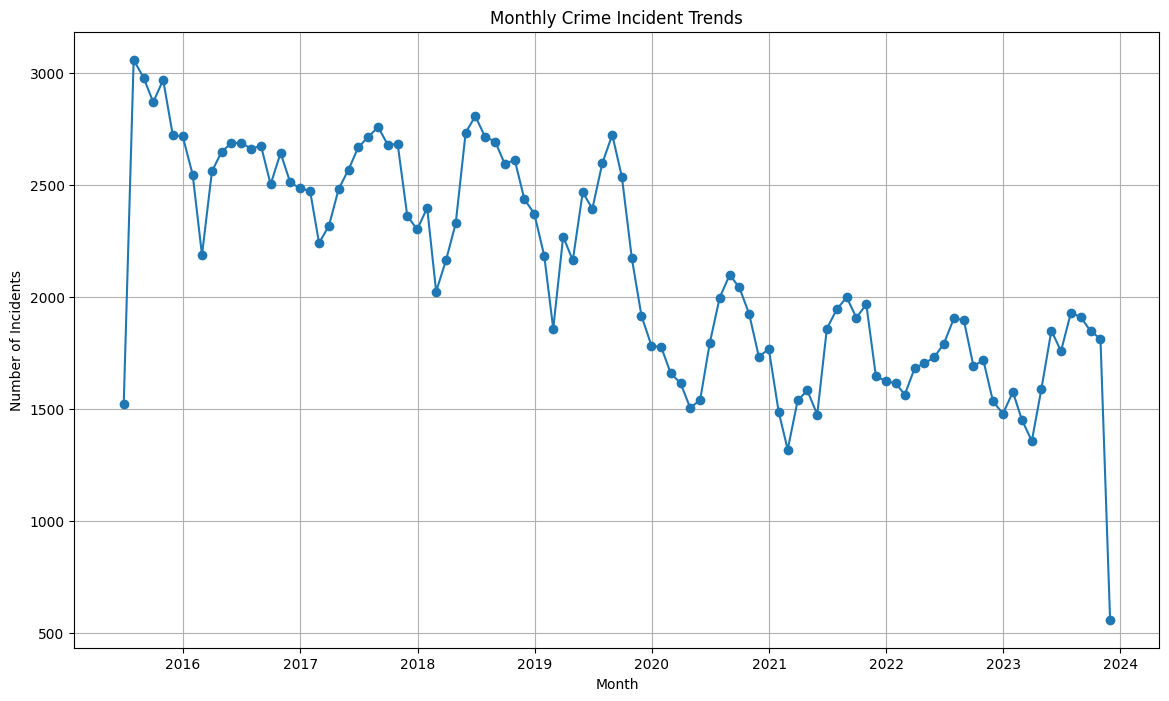

In [17]:
# Combine 'year' and 'month' columns to create a new datetime column
Report['New_Date'] = pd.to_datetime(Report[['YEAR', 'MONTH']].assign(day=1))

# Set 'New_Date' as the index
Report.set_index('New_Date', inplace=True)

# Resample the data by month and count occurrences
monthly_counts = Report.resample('M').size()

# Plot the time series data
plt.figure(figsize=(14, 8))
plt.plot(monthly_counts, marker='o')
plt.title('Monthly Crime Incident Trends')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [22]:
Report.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'STREET', 'Lat', 'Long', 'Location', 'Tier'],
      dtype='object')

In [23]:
Report = pd.read_csv('/content/Processed_data_crime.csv')

<ipython-input-23-f4391f8a82f9>:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  Report = pd.read_csv('/content/Processed_data_crime.csv')


In [27]:
Report['OCCURRED_ON_DATE'] = pd.to_datetime(Report['OCCURRED_ON_DATE'], format = 'ISO8601', utc = True)

ValueError: ignored

In [21]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Set 'OCCURRED_ON_DATE' as the index
Report.set_index('OCCURRED_ON_DATE', inplace=True)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(Report, geometry=gpd.points_from_xy(Report['Long'], Report['Lat']))

# Filter out rows with missing or invalid coordinates
gdf = gdf[~gdf['geometry'].is_empty]

# Spatiotemporal Analysis with HeatMap on Folium
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Extract coordinates directly from 'Latitude' and 'Longitude' columns
heat_data = [[point.y, point.x] for point in gdf.geometry]
HeatMap(heat_data).add_to(m)

# Temporal Plot
gdf['Lat'].plot(style='o-', color='blue')
plt.title('Temporal Distribution of Latitude over Time')
plt.xlabel('Timestamp')
plt.ylabel('Latitude')
plt.show()

# Display the Folium map directly
display(m)

KeyError: ignored

In [ ]:
# Extract relevant columns
crime_types = Report['OFFENSE_CODE'].value_counts()

# Plot bar chart for top crime types
plt.figure(figsize=(12, 8))
crime_types.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Type')
plt.show()

# Plot pie chart for overall crime type distribution
plt.figure(figsize=(10, 10))
crime_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Crime Type Distribution')
plt.show()

In [ ]:
# District-wise analysis
district_counts = Report['DISTRICT'].value_counts()

# Plotting the results
plt.figure(figsize=(12, 6))
district_counts.plot(kind='bar', color='skyblue')
plt.title('District-wise Distribution of Crimes')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Comparative analysis by street
street_counts = Report['STREET'].value_counts().nlargest(10)

# Plotting the results
plt.figure(figsize=(12, 6))
street_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Streets with Highest Crime Rates')
plt.xlabel('Street')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Plot the distribution of different crime types
plt.figure(figsize=(16, 15))
sns.countplot(y='OFFENSE_CODE', data=Report, order=Report['OFFENSE_CODE'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Drop rows with missing values in location data
sampled_data = Report.dropna(subset=['Lat', 'Long'])

# Filter data for a specific time range
start_date = '2015-06-15'
end_date = '2015-12-31'
filtered_data = sampled_data[(sampled_data['OCCURRED_ON_DATE'] >= start_date) & (sampled_data['OCCURRED_ON_DATE'] <= end_date)]

# Create an animated scatter plot with time
fig = px.scatter_mapbox(
    filtered_data,
    lat='Lat',
    lon='Long',
    color='OFFENSE_CODE',
    animation_frame='OCCURRED_ON_DATE',
    title='Spatiotemporal Analysis of Crimes',
    mapbox_style="carto-positron",
    zoom=10
)

# Show the plot
fig.show()

In [ ]:
from folium.plugins import MarkerCluster

# Drop rows with missing values in location data
crime_data = Report.dropna(subset=['Lat', 'Long'])

# Create a Folium map centered around the mean latitude and longitude
crime_map = folium.Map(location=[crime_data['Lat'].mean(), crime_data['Long'].mean()], zoom_start=12)

# Create a MarkerCluster for efficient handling of markers
marker_cluster = MarkerCluster().add_to(crime_map)

# Add markers for each crime incident
for index, row in crime_data.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['OFFENSE_CODE']).add_to(marker_cluster)

# Display the map
crime_map

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming 'OCCURRED_ON_DATE' is not already in datetime format
Report['OCCURRED_ON_DATE'] = pd.to_datetime(Report['OCCURRED_ON_DATE'])

# Set 'OCCURRED_ON_DATE' as the index
Report.set_index('OCCURRED_ON_DATE', inplace=True)

# Aggregate data at daily frequency
daily_counts = Report.resample('D').size()

# Train-test split
split_date = '2022-01-01'
train = daily_counts[daily_counts.index < split_date]
test = daily_counts[daily_counts.index >= split_date]

# SARIMA Model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # Assuming weekly seasonality
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Validate model
sarima_predictions = sarima_fit.get_forecast(steps=len(test))
mse = mean_squared_error(test, sarima_predictions.predicted_mean)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(sarima_predictions.predicted_mean, label='SARIMA Predictions', linestyle='--')
plt.title('SARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()